# Machine Learning Examples

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib as mpl
import matplotlib.pyplot as plt
# matplotlib에서 한글 폰트 사용하기 위한 셋팅
import matplotlib.font_manager as font_manager
path = 'C:\\Windows\\Fonts\\malgun.ttf'
fontprop = font_manager.FontProperties(fname=path)
mpl.rcParams['font.family'] = fontprop.get_name()
# 한글 font 사용 시, 마이너스 글자가 깨지는 현상 해결
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
df_2014 = pd.read_csv('2014_traffic_accident.csv', encoding='cp949')
df_2015 = pd.read_csv('2015_traffic_accident.csv', encoding='cp949')
df_2016 = pd.read_csv('2016_traffic_accident.csv', encoding='cp949')
# 각 데이터 프레임 하나로 붙이기
df1 = pd.concat([df_2014, df_2015, df_2016], ignore_index=True).set_index('구분')
df1.head(15)

,사고(건),사망(명),부상(명)
구분,,,
2014년1월,169,7,347
2014년2월,145,3,268
2014년3월,206,12,358
2014년4월,182,4,360
2014년5월,218,17,474
2014년6월,233,13,457
2014년7월,229,14,431
2014년8월,222,9,447
2014년9월,225,15,430


In [3]:
df2 = df1.copy()
# df1의 인덱스 정보를 datetime 로 변경
df2.index = pd.to_datetime(df2.index, format='%Y년%m월')

DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01'],
              dtype='datetime64[ns]', name='구분', freq=None)

In [5]:
df2.head(10)

,사고(건),사망(명),부상(명)
구분,,,
2014-01-01,169,7,347
2014-02-01,145,3,268
2014-03-01,206,12,358
2014-04-01,182,4,360
2014-05-01,218,17,474
2014-06-01,233,13,457
2014-07-01,229,14,431
2014-08-01,222,9,447
2014-09-01,225,15,430


In [7]:
df2 = df2.set_index([df2.index.year, df2.index.month])
df2.head(10)

사고(건)  사망(명)  부상(명)
구분   구분                     
2014 1     169      7    347
     2     145      3    268
     3     206     12    358
     4     182      4    360
     5     218     17    474
     6     233     13    457
     7     229     14    431
     8     222      9    447
     9     225     15    430
     10    210     14    392

In [8]:
df2.index.names = ['년도', '월']
df2.head(10)

사고(건)  사망(명)  부상(명)
년도   월                      
2014 1     169      7    347
     2     145      3    268
     3     206     12    358
     4     182      4    360
     5     218     17    474
     6     233     13    457
     7     229     14    431
     8     222      9    447
     9     225     15    430
     10    210     14    392

In [11]:
df2.groupby('년도')['사망(명)'].mean()

년도
2014    10.833333
2015     9.000000
2016     8.166667
Name: 사망(명), dtype: float64

In [14]:
df2.loc[2016]['사망(명)'].sum() / df2.loc[2016]['사고(건)'].sum() # 2016년 사고 건수 대비 사망자 비율

0.04027949034114262

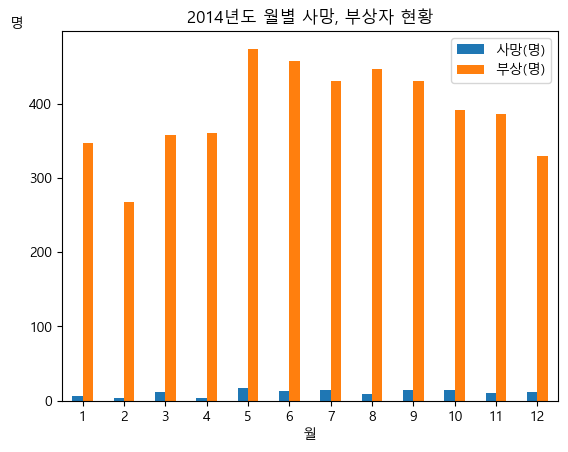

In [28]:
df2.loc[2014][['사망(명)', '부상(명)']].plot(kind='bar', rot=0)
plt.title('2014년도 월별 사망, 부상자 현황')
plt.ylabel('명', rotation=0, loc='top')
plt.show()

In [29]:
import seaborn as sns

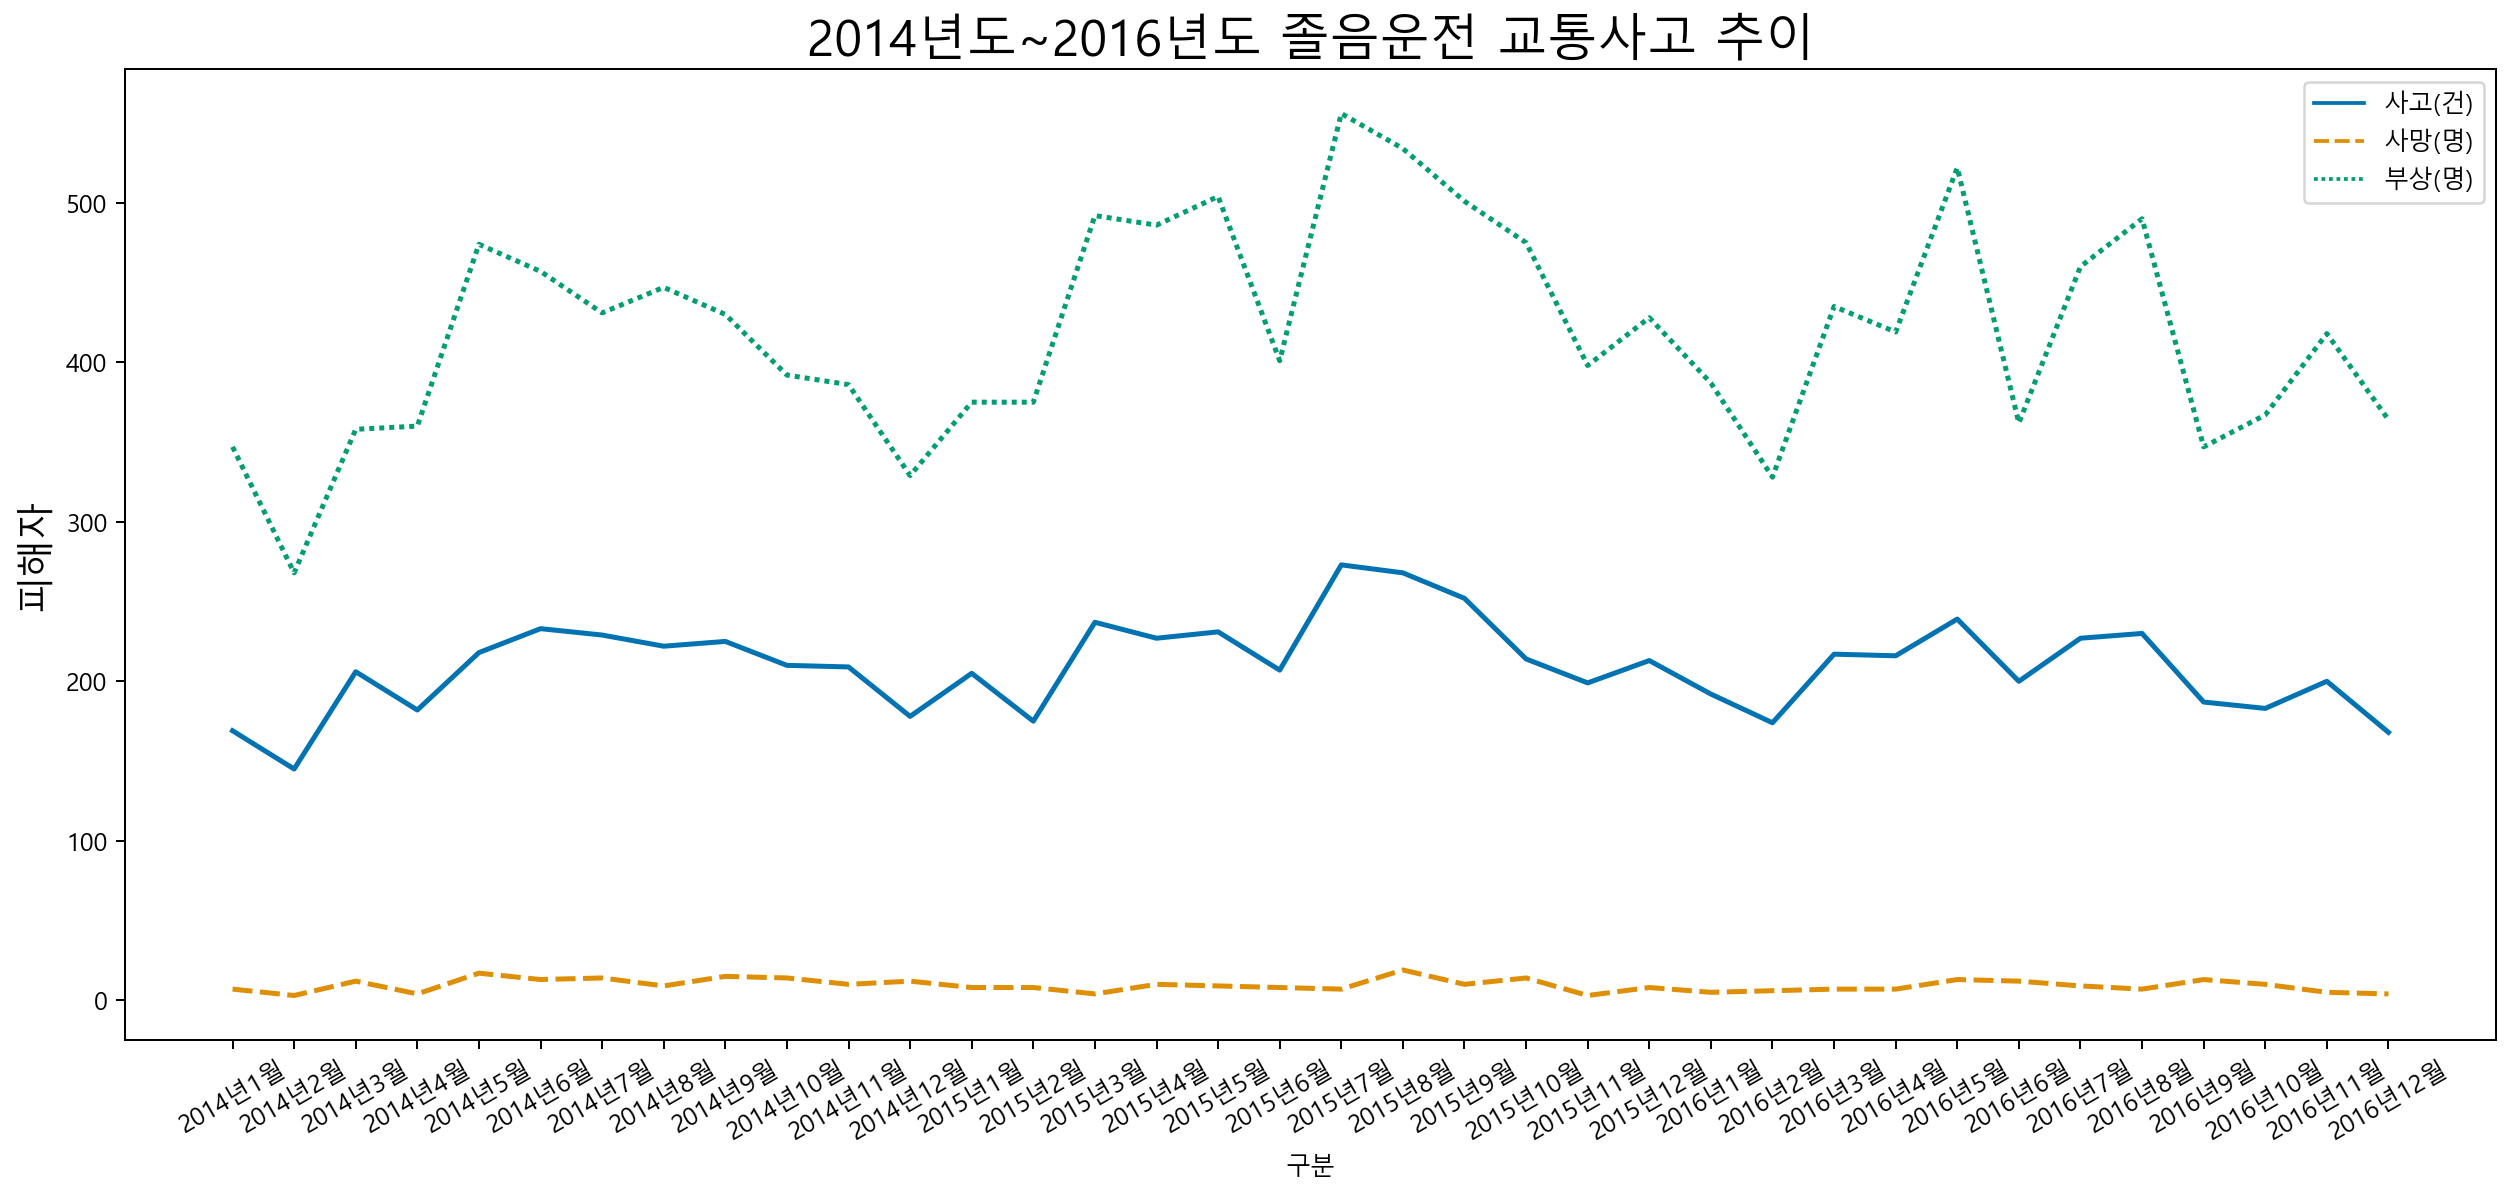

In [38]:
plt.figure(figsize=(17, 7), dpi=180)
sns.lineplot(data=df1, palette='colorblind', linewidth=2)
plt.title('2014년도~2016년도 졸음운전 교통사고 추이', fontsize=20)
plt.xticks(rotation=30)
plt.ylabel('피해자', fontsize=15)
plt.show()

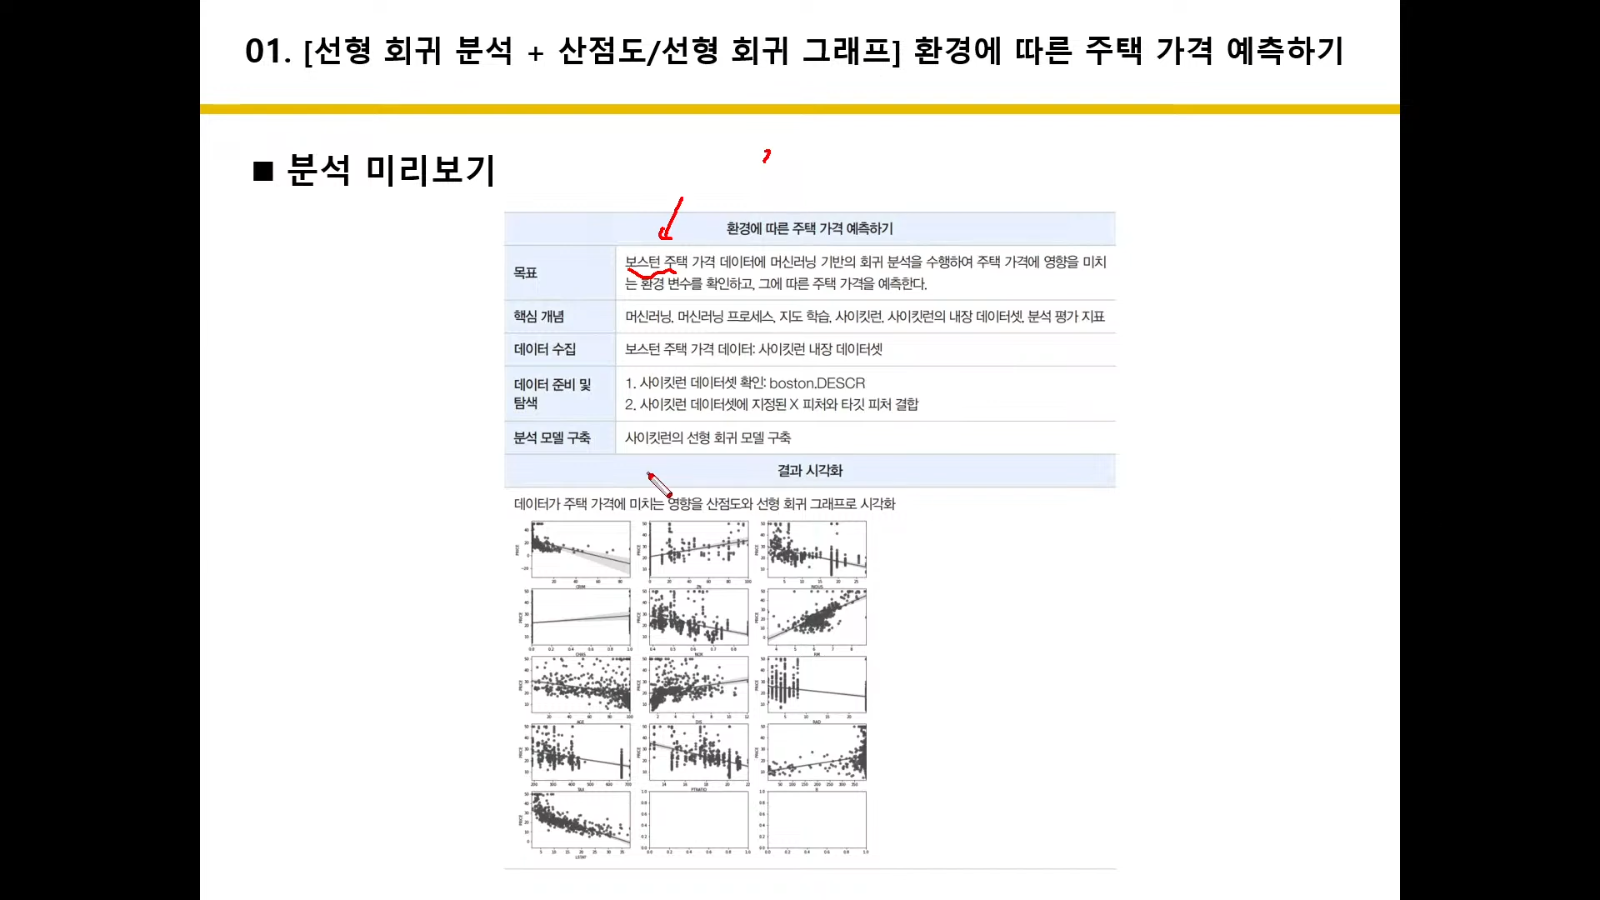

In [39]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.data

C:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fu

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [40]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [42]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


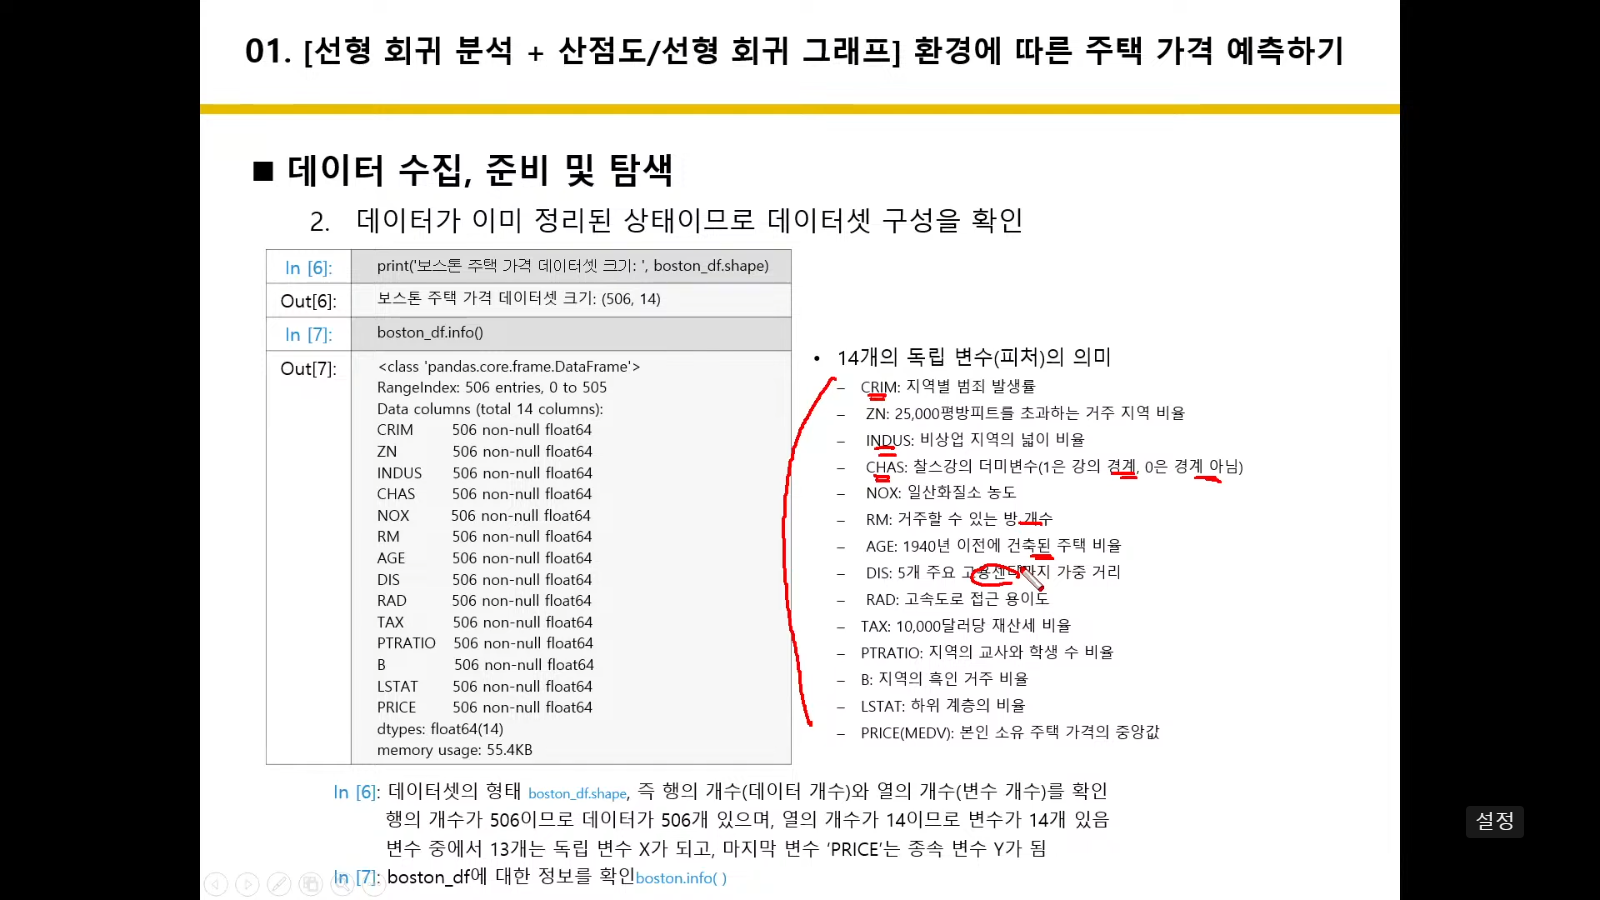

In [43]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [46]:
x = boston_df.drop('PRICE', axis=1)
y = boston_df['PRICE']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=156)
lr = LinearRegression()
lr.fit(x_train, y_train)

y_predict = lr.predict(x_test)

In [47]:
from sklearn.metrics import mean_squared_error

In [50]:
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

print('mse : {:.3f}, rmse : {:.3f}'.format(mse, rmse))

mse : 17.297, rmse : 4.159


In [51]:
lr.coef_, lr.intercept_

(array([-1.12979614e-01,  6.55124002e-02,  3.44366694e-02,  3.04589777e+00,
        -1.97958320e+01,  3.35496880e+00,  5.93713290e-03, -1.74185354e+00,
         3.55884364e-01, -1.42954516e-02, -9.20180066e-01,  1.03966156e-02,
        -5.66182106e-01]),
 40.99559517216412)

In [52]:
coef = pd.Series(data=np.round(lr.coef_, 2), index=x.columns)
coef.sort_values(ascending=False)

RM          3.35
CHAS        3.05
RAD         0.36
ZN          0.07
INDUS       0.03
AGE         0.01
B           0.01
TAX        -0.01
CRIM       -0.11
LSTAT      -0.57
PTRATIO    -0.92
DIS        -1.74
NOX       -19.80
dtype: float64

In [53]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


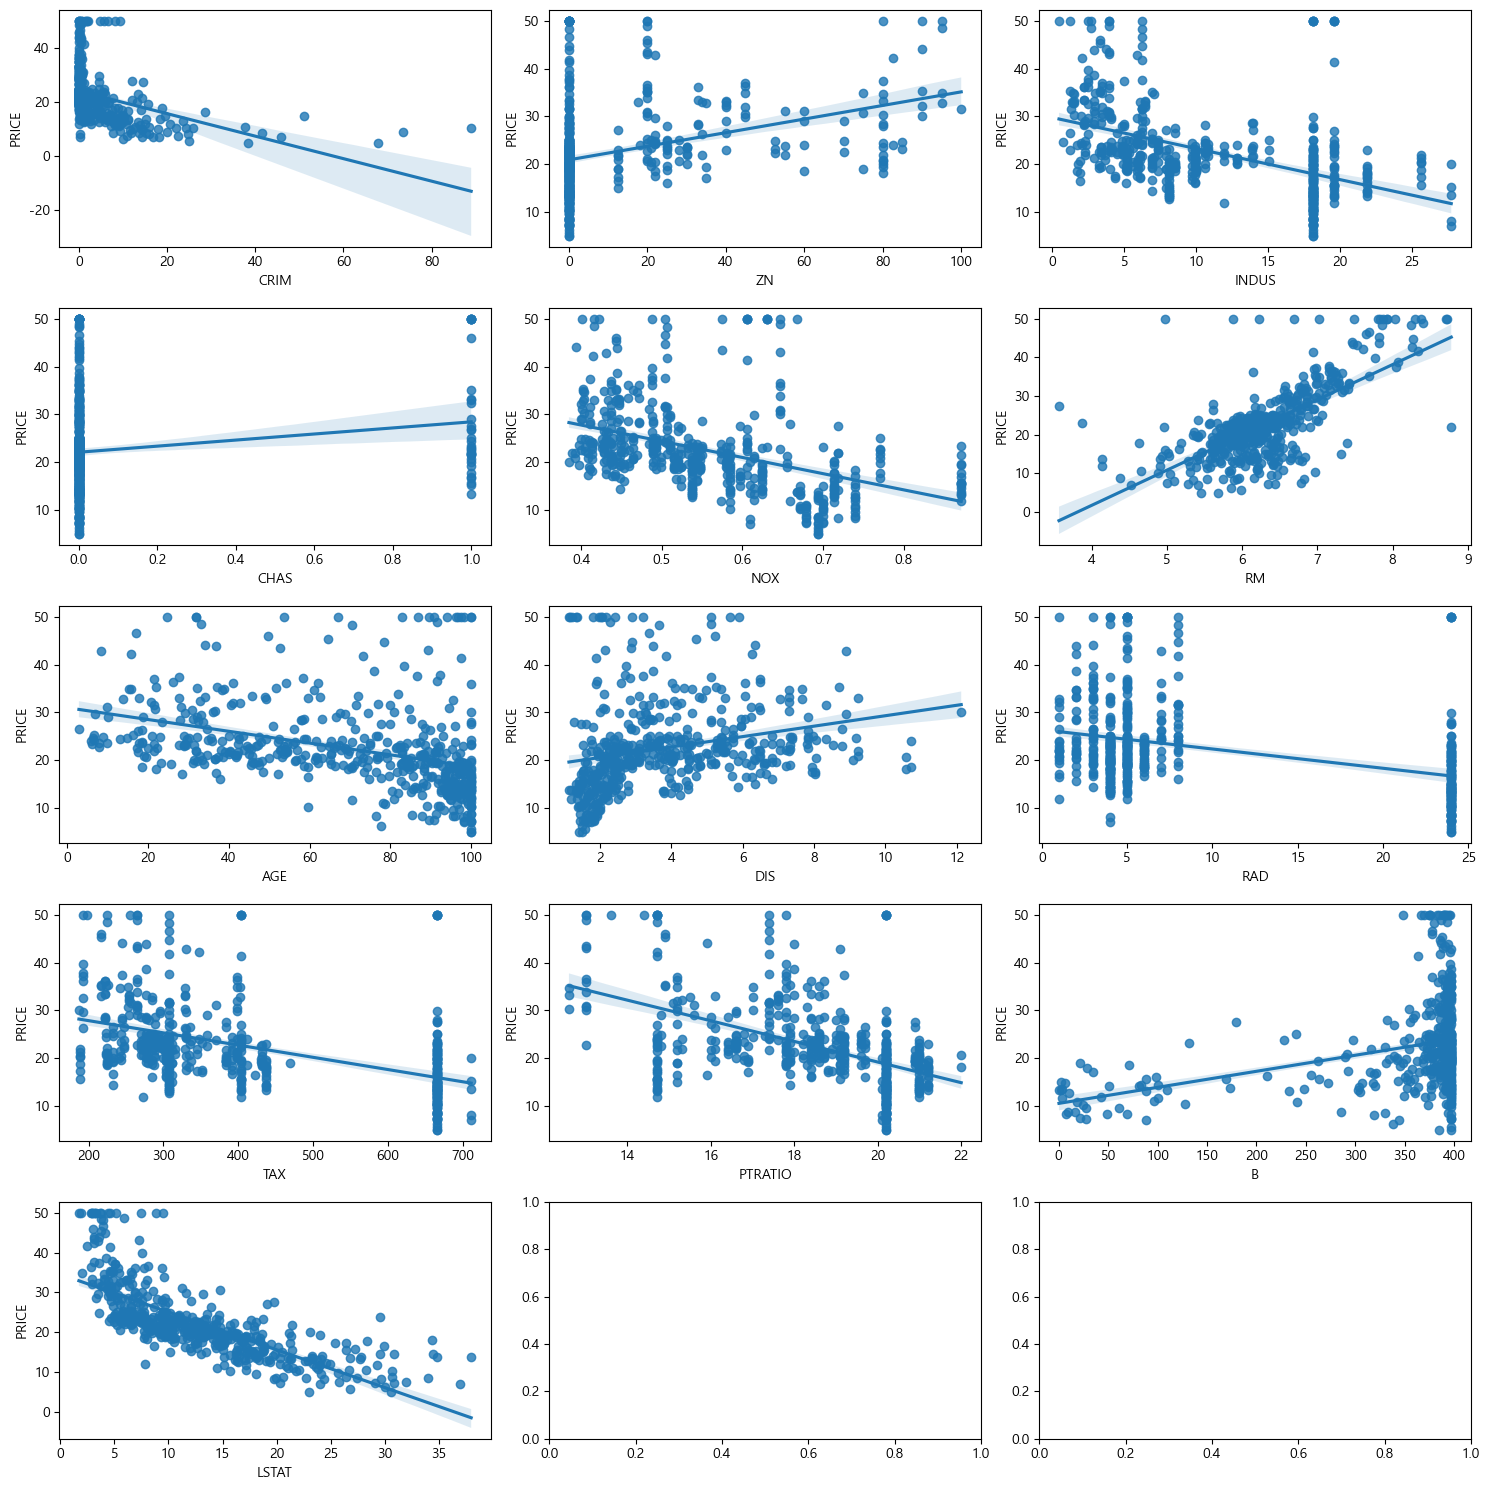

In [55]:
fig, axes = plt.subplots(5, 3, figsize=(15, 15))
x_features = x.columns

for i, feature in enumerate(x_features):
    row = i // 3
    col = i % 3
    sns.regplot(x=feature, y='PRICE', data=boston_df, ax=axes[row][col])
plt.tight_layout()
plt. show()

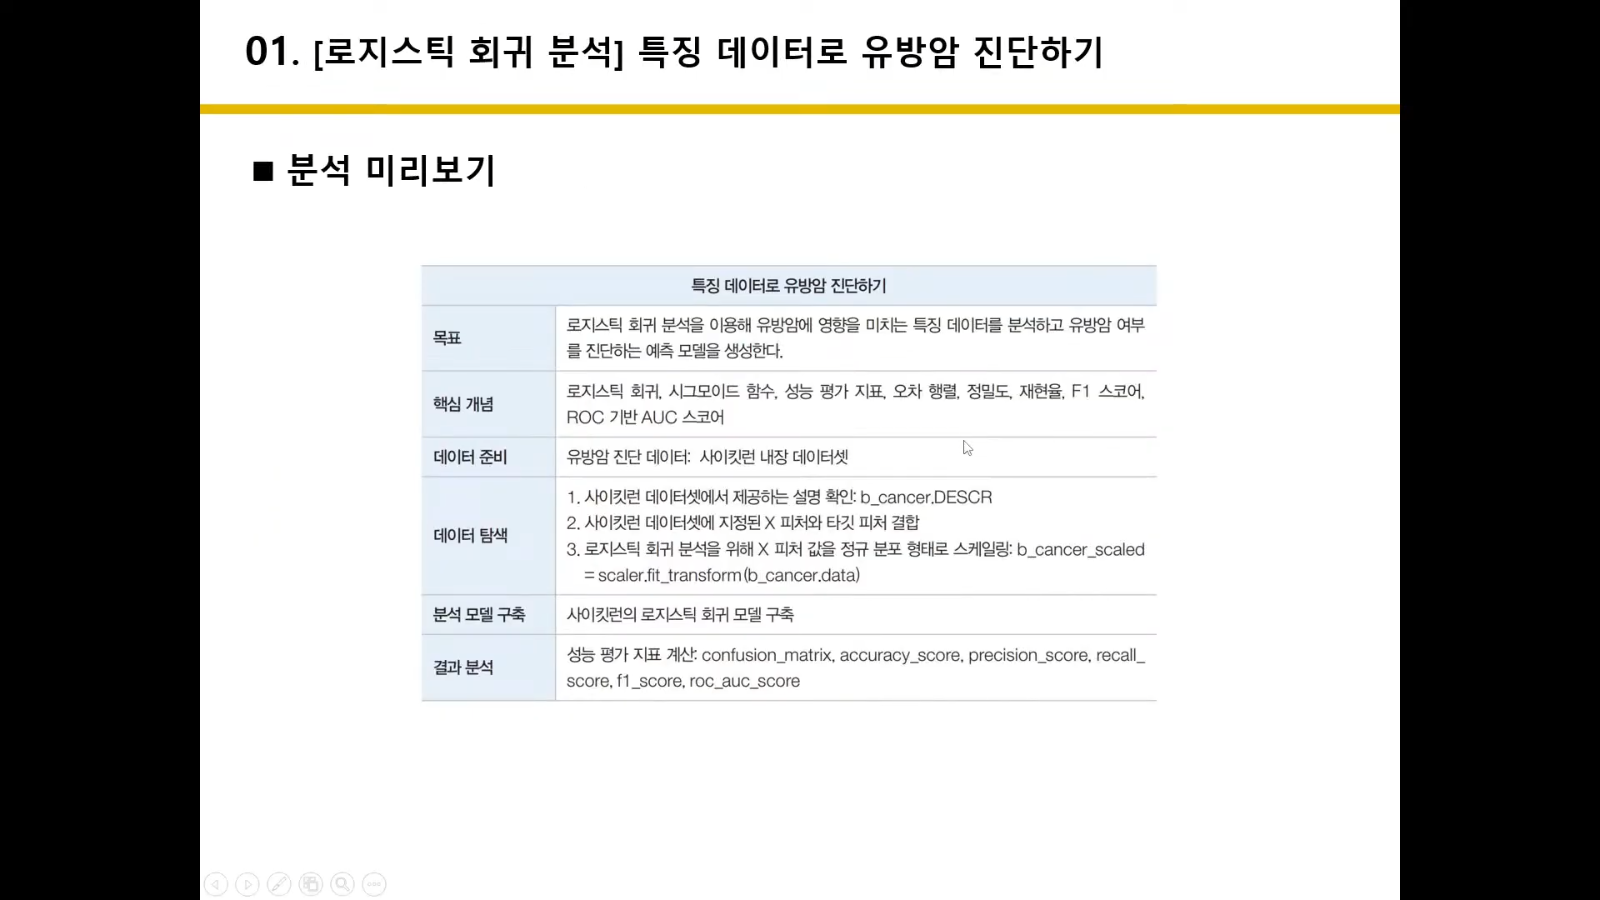

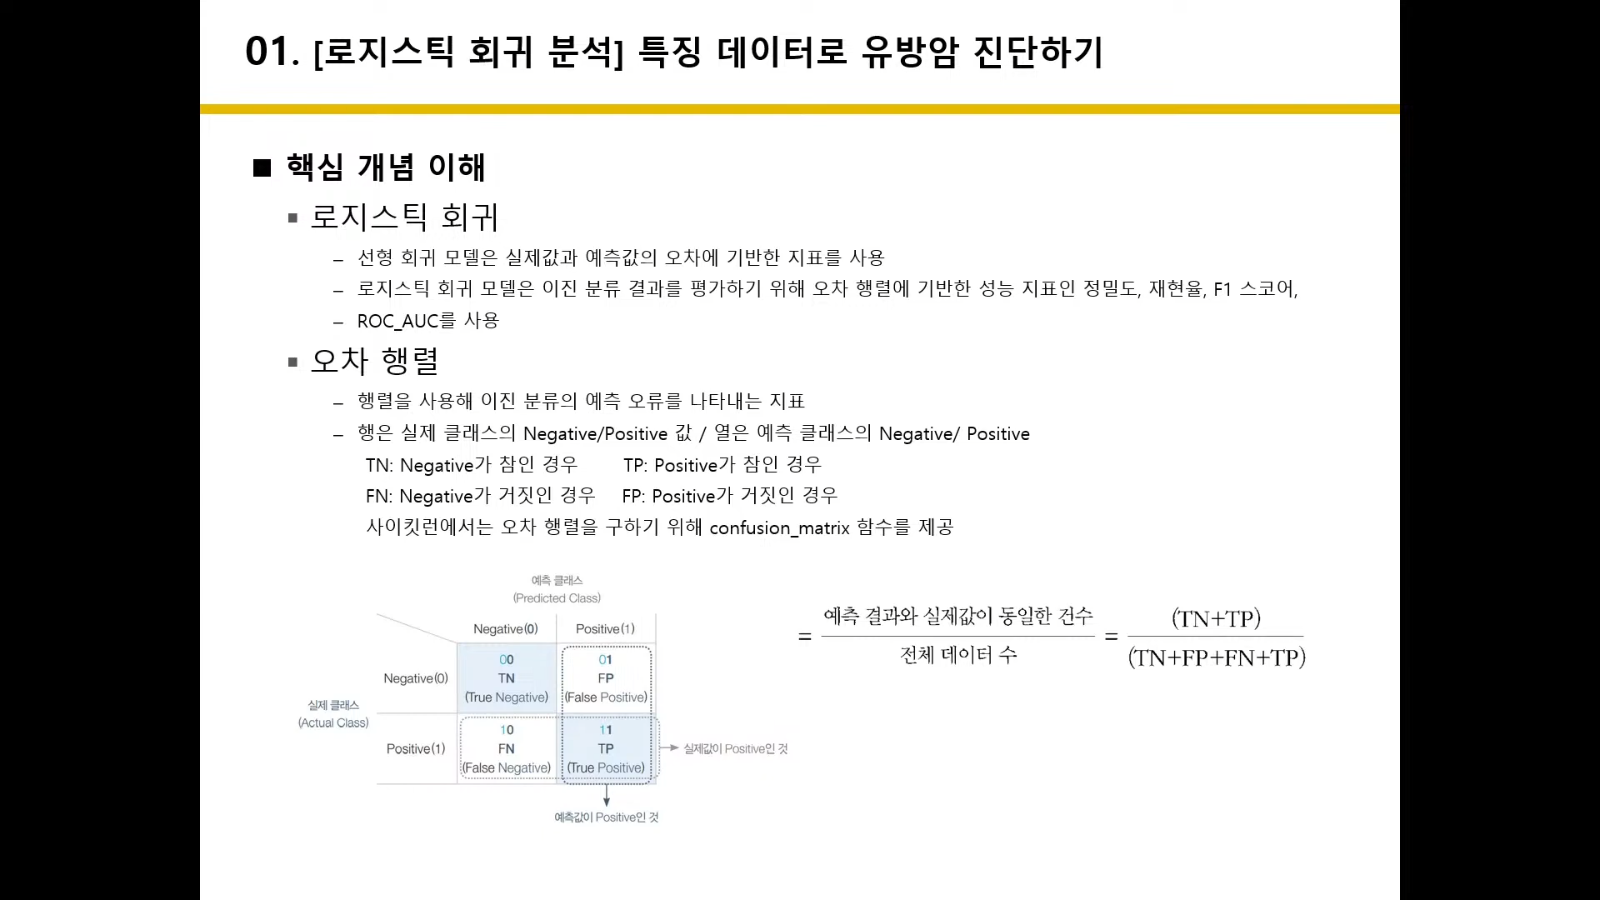

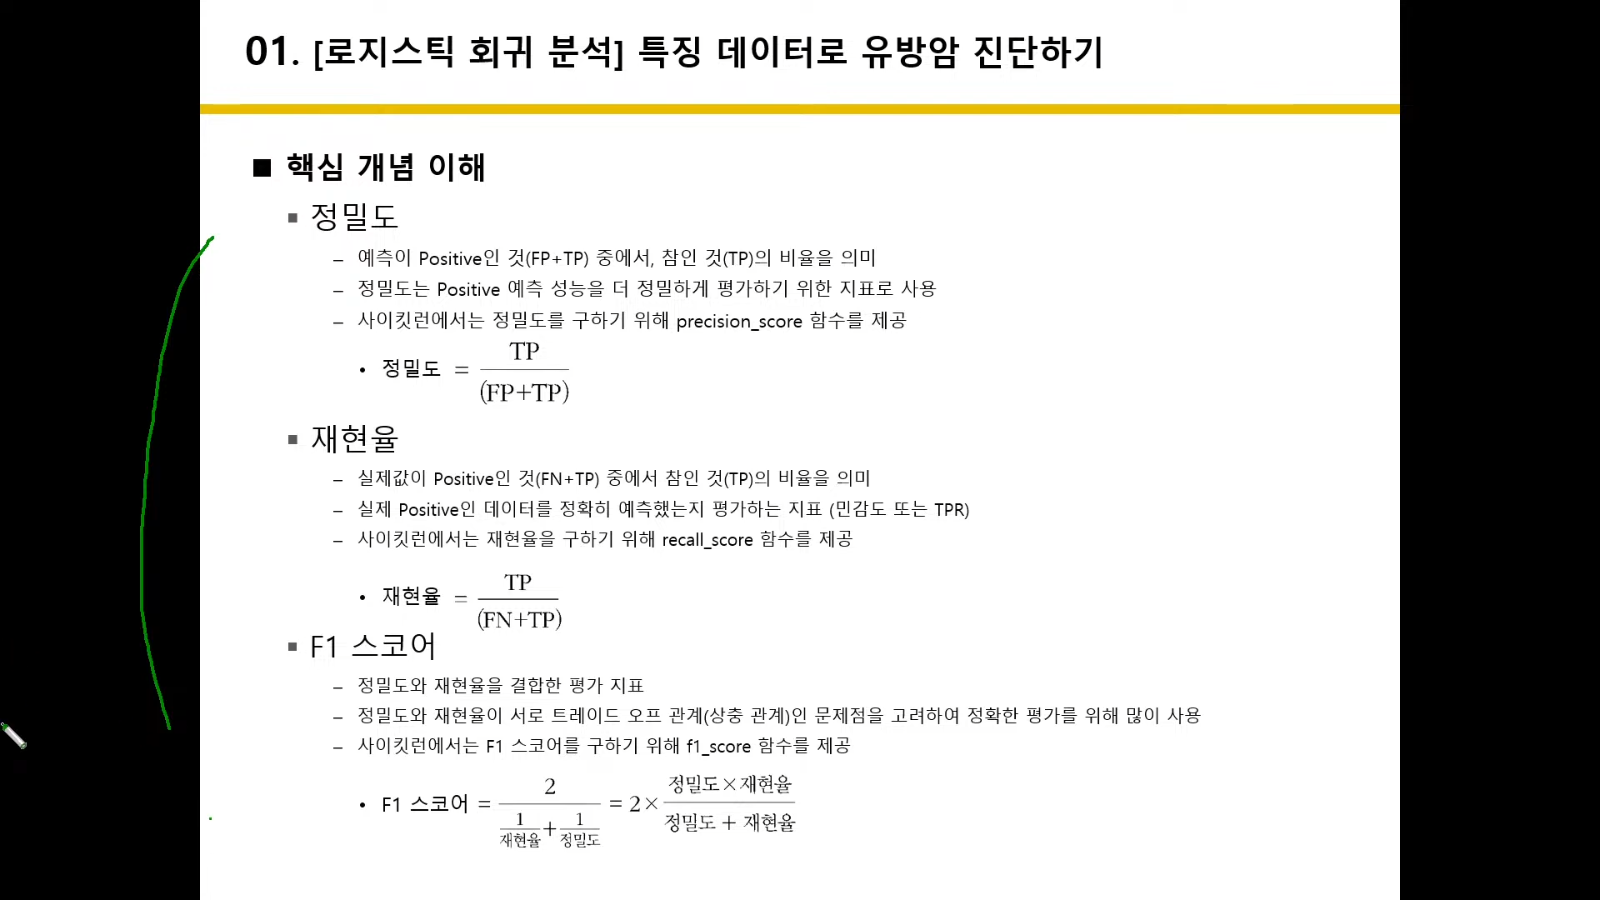